## Stack - Bootcamp de Data Science

### Machine Learning.

In [10]:
#!pip uninstall -y pycaret numpy scikit-learn
!pip3 uninstall -y pycaret numpy scikit-learn plotly pyod kmodes matplotlib spacy pandas-profiling pandas scikit-plot
#!pip install pycaret==2.3 scikit-learn==0.23.0
!pip3 install  pycaret==2.3 scikit-learn==0.23.2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Found existing installation: pycaret 2.3.0
Uninstalling pycaret-2.3.0:
  Successfully uninstalled pycaret-2.3.0
Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5
Found existing installation: scikit-learn 0.23.2
Uninstalling scikit-learn-0.23.2:
  Successfully uninstalled scikit-learn-0.23.2
Found existing installation: plotly 5.3.1
Uninstalling plotly-5.3.1:
  Successfully uninstalled plotly-5.3.1
Found existing installation: pyod 0.9.4
Uninstalling pyod-0.9.4:
  Successfully uninstalled pyod-0.9.4
Found existing installation: kmodes 0.11.1
Uninstalling kmodes-0.11.1:
  Successfully uninstalled kmodes-0.11.1
Found existing installation: matplotlib 3.3.4
Uninstalling matplotlib-3.3.4:
  Successfully uninstalled matplotlib-3.3.4
Found existing inst

In [11]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [12]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [13]:
client.fget_object(
            "processing",
            "employees_dataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")

In [14]:
df.head()

,department,salary,left,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident
0,sales,low,1.0,266.000000,2.0,38.0,53.0,3.0,0.0
1,sales,medium,1.0,252.000000,5.0,80.0,86.0,6.0,0.0
2,sales,medium,1.0,289.666667,7.0,11.0,88.0,4.0,0.0
3,sales,low,1.0,275.666667,5.0,72.0,87.0,5.0,0.0
4,sales,low,1.0,292.333333,2.0,37.0,52.0,3.0,0.0


#### Organizando o dataset.

In [15]:
df = df[['department', 'salary', 'mean_work_last_3_months',
       'number_projects', 'satisfaction_level', 'last_evaluation',
       'time_in_company', 'work_accident','left']]

In [16]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0


#### Verificando os registros missing.

In [17]:
df.isnull().sum()

department                 1
salary                     1
mean_work_last_3_months    0
number_projects            1
satisfaction_level         1
last_evaluation            1
time_in_company            1
work_accident              1
left                       1
dtype: int64

In [18]:
df[df.notnull()]

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266.000000,2.0,38.0,53.0,3.0,0.0,1.0
1,sales,medium,252.000000,5.0,80.0,86.0,6.0,0.0,1.0
2,sales,medium,289.666667,7.0,11.0,88.0,4.0,0.0,1.0
3,sales,low,275.666667,5.0,72.0,87.0,5.0,0.0,1.0
4,sales,low,292.333333,2.0,37.0,52.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
14995,support,low,253.333333,2.0,37.0,48.0,3.0,0.0,1.0
14996,support,low,288.000000,2.0,37.0,53.0,3.0,0.0,1.0
14997,support,low,272.000000,6.0,11.0,96.0,4.0,0.0,1.0
14998,support,low,276.666667,2.0,37.0,52.0,3.0,0.0,1.0


In [19]:
df = df[:14998]

#### Alterando os tipos de dados.

In [20]:
df["number_projects"] = df["number_projects"].astype(int)
df["mean_work_last_3_months"] = df["mean_work_last_3_months"].astype(int)
df["time_in_company"] = df["time_in_company"].astype(int)
df["work_accident"] = df["work_accident"].astype(int)
df["left"] = df["left"].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14998 entries, 0 to 14997
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   department               14998 non-null  object 
 1   salary                   14998 non-null  object 
 2   mean_work_last_3_months  14998 non-null  int64  
 3   number_projects          14998 non-null  int64  
 4   satisfaction_level       14998 non-null  float64
 5   last_evaluation          14998 non-null  float64
 6   time_in_company          14998 non-null  int64  
 7   work_accident            14998 non-null  int64  
 8   left                     14998 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [22]:
df.head()

,department,salary,mean_work_last_3_months,number_projects,satisfaction_level,last_evaluation,time_in_company,work_accident,left
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


In [23]:
df = df[:14998]

#### Renomeando atributos

In [24]:
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_projects': 'projectCount',
                        'mean_work_last_3_months': 'averageMonthlyHours',
                        'time_in_company': 'yearsAtCompany',
                        'work_accident': 'workAccident',
                        'left' : 'turnover'
                        })

In [25]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,sales,low,266,2,38.0,53.0,3,0,1
1,sales,medium,252,5,80.0,86.0,6,0,1
2,sales,medium,289,7,11.0,88.0,4,0,1
3,sales,low,275,5,72.0,87.0,5,0,1
4,sales,low,292,2,37.0,52.0,3,0,1


###  Importancia de Features

#### Converte os atributos em categoricos.

In [28]:
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [29]:
df.head()

,department,salary,averageMonthlyHours,projectCount,satisfaction,evaluation,yearsAtCompany,workAccident,turnover
0,7,1,266,2,38.0,53.0,3,0,1
1,7,2,252,5,80.0,86.0,6,0,1
2,7,2,289,7,11.0,88.0,4,0,1
3,7,1,275,5,72.0,87.0,5,0,1
4,7,1,292,2,37.0,52.0,3,0,1


#### Separando os conjuntos de dados.

In [30]:
target_name = 'turnover'
X = df.drop('turnover', axis=1)
y = df[target_name]

#### Transformando os dados.

In [33]:
import sklearn

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X = scaler.fit_transform(X)

In [37]:
X

array([[0.77777778, 0.5       , 0.38202247, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.77777778, 1.        , 0.2247191 , ..., 0.78125   , 0.5       ,
        0.        ],
       [0.77777778, 1.        , 0.64044944, ..., 0.8125    , 0.25      ,
        0.        ],
       ...,
       [0.88888889, 0.5       , 0.23595506, ..., 0.1875    , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.62921348, ..., 0.265625  , 0.125     ,
        0.        ],
       [0.88888889, 0.5       , 0.4494382 , ..., 0.9375    , 0.25      ,
        0.        ]])

#### Separando os conjuntos.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

#### Treinando o algoritmo de arvore de decisão.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [44]:
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns

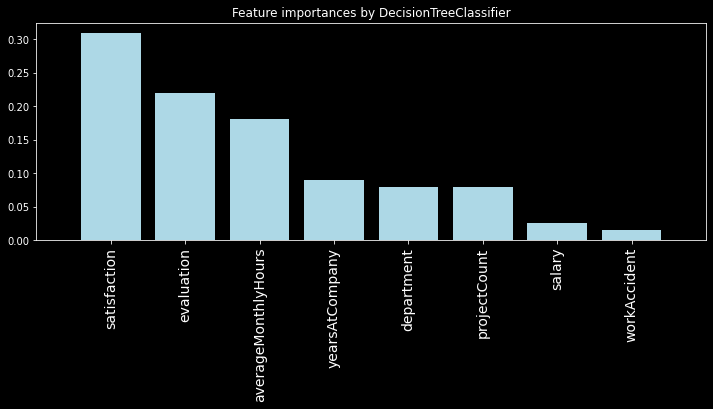

In [45]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

#### Filtrando apenas os atributos relevantes.

In [46]:
X = df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany"]]

#### Separando os conjuntos de dados.

In [47]:
scaler = MinMaxScaler()

In [48]:
X = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

In [50]:
X_train

array([[0.06593407, 0.046875  , 0.53932584, 0.25      ],
       [0.        , 0.703125  , 0.41573034, 0.25      ],
       [0.81318681, 0.296875  , 0.76404494, 0.625     ],
       ...,
       [0.32967033, 0.3125    , 0.59550562, 0.125     ],
       [0.83516484, 0.359375  , 0.58426966, 0.        ],
       [0.50549451, 0.578125  , 0.46067416, 0.125     ]])

#### Função do modelo de base.

In [51]:
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

#### Importando métodos de métrica de avaliação.

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [53]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [54]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [55]:
y_predict = base_rate_model(X_test)

In [56]:
accuracy_result(y_test, y_predict)

Accuracy = 0.76


In [57]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/home/daniel/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo de Regressão Logística.

#### Instânciando o algoritmo.

In [58]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Realizando o treinamento.

In [59]:
logis.fit(X_train, y_train)

LogisticRegression()

#### Calculando as predições.

In [61]:
y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [62]:
accuracy_result(y_test, y_predict)

Accuracy = 0.75


In [63]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.5053008079872368

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2286
           1       0.33      0.03      0.05       714

    accuracy                           0.75      3000
   macro avg       0.55      0.51      0.46      3000
weighted avg       0.66      0.75      0.67      3000



### Modelo de Arvore de decisão.

#### Instânciando o algoritmo.

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [65]:
dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [66]:
y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [67]:
accuracy_result(y_test, y_predict)

Accuracy = 0.73


In [68]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.6336285170236075

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2286
           1       0.43      0.46      0.44       714

    accuracy                           0.73      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.73      0.73      0.73      3000



### Modelo de Arvore Aleatória (Random Forest)

#### Instânciando o algoritmo.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()

#### Realizando o treinamento.

In [72]:
rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [73]:
y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [74]:
accuracy_result(y_test, y_predict)

Accuracy = 0.80


In [75]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 0.6893182469838329

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2286
           1       0.62      0.47      0.53       714

    accuracy                           0.80      3000
   macro avg       0.73      0.69      0.70      3000
weighted avg       0.79      0.80      0.79      3000



### Pycaret

#### Importando os métodos.

In [76]:
from pycaret.classification import *

#### Definindo o Setup.

In [78]:
s = setup( df[["satisfaction","evaluation","averageMonthlyHours","yearsAtCompany","turnover"]]
          ,target = "turnover"
          ,numeric_features = ["yearsAtCompany"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True
          ,silent=True
         )

,Description,Value
0,session_id,4022
1,Target,turnover
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14998, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


#### Comparando diferentes modelos.

In [79]:
best = compare_models(fold = 5,sort = 'AUC',)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8030,0.7767,0.6559,0.5758,0.6132,0.4818,0.4837,0.2140
lightgbm,Light Gradient Boosting Machine,0.8227,0.7743,0.6102,0.6327,0.6210,0.5054,0.5057,0.0560
ada,Ada Boost Classifier,0.7741,0.7686,0.6835,0.5198,0.5903,0.4385,0.4464,0.1040
rf,Random Forest Classifier,0.7929,0.7448,0.5110,0.5730,0.5401,0.4070,0.4083,0.4020
knn,K Neighbors Classifier,0.7126,0.7284,0.6575,0.4319,0.5213,0.3284,0.3432,0.3480
qda,Quadratic Discriminant Analysis,0.7044,0.7220,0.7171,0.4280,0.5360,0.3389,0.3632,0.0200
et,Extra Trees Classifier,0.7859,0.7160,0.4830,0.5582,0.5178,0.3811,0.3828,0.3400
nb,Naive Bayes,0.6938,0.6983,0.6110,0.4053,0.4873,0.2816,0.2937,0.3000
lr,Logistic Regression,0.6699,0.6861,0.6287,0.3825,0.4756,0.2551,0.2719,0.3940
lda,Linear Discriminant Analysis,0.6702,0.6852,0.6167,0.3810,0.4710,0.2504,0.2657,0.0200


#### Criando o modelo.

In [82]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8043,0.7689,0.6460,0.5799,0.6112,0.4809,0.4822
1,0.7981,0.7799,0.6480,0.5664,0.6045,0.4697,0.4717
2,0.8048,0.7803,0.6600,0.5789,0.6168,0.4866,0.4885
3,0.7990,0.7786,0.6680,0.5661,0.6128,0.4783,0.4813
4,0.8090,0.7760,0.6573,0.5878,0.6206,0.4935,0.4949
Mean,0.8030,0.7767,0.6559,0.5758,0.6132,0.4818,0.4837
SD,0.0040,0.0042,0.0081,0.0084,0.0055,0.0080,0.0078


#### Realizando o tunning do modelo.

In [83]:
tuned_gbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {"learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.7710,0.6240,0.5954,0.6094,0.4835,0.4838
1,0.8029,0.7747,0.6280,0.5793,0.6027,0.4719,0.4726
2,0.8200,0.7762,0.6540,0.6147,0.6337,0.5146,0.5150
3,0.8113,0.7771,0.6500,0.5952,0.6214,0.4961,0.4970
4,0.8232,0.7753,0.6333,0.6270,0.6301,0.5140,0.5140
Mean,0.8134,0.7749,0.6379,0.6023,0.6195,0.4960,0.4965
SD,0.0074,0.0021,0.0120,0.0167,0.0119,0.0168,0.0166


#### Finalizando o modelo.

In [84]:
final_model = finalize_model(tuned_gbc)

In [86]:
save_model(final_model,'model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['yearsAtCompany'],
                                       target='turnover', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical...
                                             learning_rate=0.2, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
            

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [88]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exportando o conjunto de dados para o disco.

In [89]:
df.to_csv("dataset.csv",index=False)

In [90]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)